# Pothole Detection

### Install and Import Dependencies

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import os
from sklearn.model_selection import train_test_split
from tensorflow import keras
import pandas as pd
import seaborn as sns

### Data

This data comes from the [Cracks and Potholes in Road Images Dataset](https://github.com/biankatpas/Cracks-and-Potholes-in-Road-Images-Dataset/tree/master/Dataset). It is licensed under the MIT License, giving us permission to modify and distribute the data for both private and commercial use.

DATA DESCRIPTION

In [4]:
import platform
mysystem = platform.system()
# We need to first download the data here:
file_download_link = "https://github.com/biankatpas/Cracks-and-Potholes-in-Road-Images-Dataset/zipball/master"
# Check for windows

if mysystem != 'Windows':
    !wget -O dataset.zip --no-check-certificate "$file_download_link"
    !unzip -q dataset.zip

else:
  print('Please download the data using the following link:', file_download_link)

--2022-11-30 07:53:39--  https://github.com/biankatpas/Cracks-and-Potholes-in-Road-Images-Dataset/zipball/master
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/biankatpas/Cracks-and-Potholes-in-Road-Images-Dataset/legacy.zip/refs/heads/master [following]
--2022-11-30 07:53:40--  https://codeload.github.com/biankatpas/Cracks-and-Potholes-in-Road-Images-Dataset/legacy.zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.27.177.114
Connecting to codeload.github.com (codeload.github.com)|20.27.177.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘dataset.zip’

dataset.zip             [           <=>      ] 224.54M  19.7MB/s    in 11s     

2022-11-30 07:53:52 (19.6 MB/s) - ‘dataset.zip’ saved [235450096]

replace biankatpas-Cracks-and

### Create Dataset

The first step is to create the dataset with the images, their labels, and the parameters for the pothole bounding boxes. We will use **keras** to load and convert images to numpy arrays, and **cv2** to detect the potholes and label them. We store the dataset as a csv file.

Below is an example of how cv2 creates a bounding box around a pothole using the provided masks.

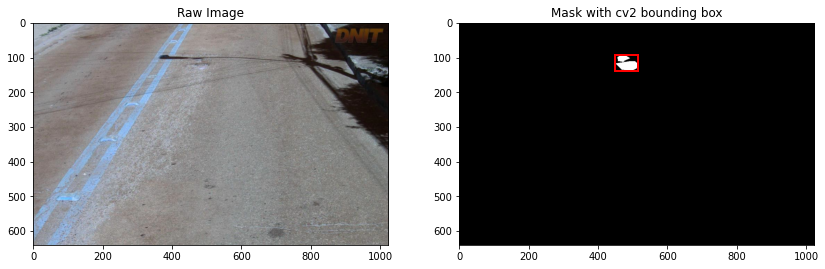

In [ ]:
master = 'Dataset'
path = master + "/820315_ES_259_259ES000000_03060/820315_ES_259_259ES000000_03060_RAW.jpg"
raw_img = cv2.imread(path)
path = master + "/820315_ES_259_259ES000000_03060/820315_ES_259_259ES000000_03060_POTHOLE.png"
mask = cv2.imread(path, 0)
x,y,w,h = cv2.boundingRect(mask)
fig, axs = plt.subplots(1,2, figsize=(14,20))
axs[0].set_title("Raw Image")
axs[0].imshow(raw_img)
axs[1].set_title("Mask with cv2 bounding box")
axs[1].imshow(mask, cmap= 'gray')
axs[1].add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))

In [ ]:
# Create Train/Validation csv
imgs = []
img_paths = []
width = []
height = []
pothole = []
x_center = []
y_center = []
box_w = []
box_h = []
box = []

master = 'biankatpas-Cracks-and-Potholes-in-Road-Images-Dataset-1f20054/Dataset'
samples = os.listdir(master)
for sample in samples:
    # Path for Raw Image
    img_path = master + "/" + sample + "/" + sample + "_RAW.jpg"
    img_paths.append(img_path)
    # Load image into ram
    # We resize it to (600, 600) and convert to grayscale
    img = keras.preprocessing.image.load_img(img_path, color_mode = 'grayscale', target_size = (600, 600))
    img = keras.preprocessing.image.img_to_array(img)
    img = img/255
    imgs.append(img)
    
    # Image Dimensions
    width.append(600)
    height.append(600)
    
    # Get bounding box of image
    path = master + "/" + sample + "/" + sample + "_POTHOLE.png"
    mask = cv2.imread(path, 0)
    # Convert from 0-255 to 0-1
    mask = (mask > 0).astype(np.uint8)
    mask = cv2.resize(mask,[600,600],cv2.INTER_NEAREST)
    x,y,w,h = cv2.boundingRect(mask)
    x_center.append(x)
    y_center.append(y)
    box_w.append(w)
    box_h.append(h)
    box.append((x,y,w,h))
    
    # Get label
    if ((x == 0) and (y == 0) and (w == 0) and (h == 0)):
        label = 0
    else:
        label = 1
    pothole.append(label)

# Create Df and csv
df = pd.DataFrame({'img':imgs, 'img_path':img_paths , 'width':width, 'height':height, 'pothole':pothole, 'x_center':x_center, 'y_center':y_center, 'box_w':box_w, 'box_h':box_h, 'box':box})
df.to_csv('pothole_data.csv', index=None)

In [ ]:
# Load data from csv
potholes = pd.read_csv('pothole_data.csv')
potholes.head()

,img,img_path,width,height,pothole,x_center,y_center,box_w,box_h,box
0,[[[0.28235295]\n [0.25490198]\n [0.24313726]...,biankatpas-Cracks-and-Potholes-in-Road-Images-...,600,600,0,0,0,0,0,"(0, 0, 0, 0)"
1,[[[0.36862746]\n [0.27058825]\n [0.36078432]...,biankatpas-Cracks-and-Potholes-in-Road-Images-...,600,600,0,0,0,0,0,"(0, 0, 0, 0)"
2,[[[0.41568628]\n [0.3254902 ]\n [0.47843137]...,biankatpas-Cracks-and-Potholes-in-Road-Images-...,600,600,0,0,0,0,0,"(0, 0, 0, 0)"
3,[[[0.43529412]\n [0.40784314]\n [0.42352942]...,biankatpas-Cracks-and-Potholes-in-Road-Images-...,600,600,0,0,0,0,0,"(0, 0, 0, 0)"
4,[[[0.19607843]\n [0.21960784]\n [0.2627451 ]...,biankatpas-Cracks-and-Potholes-in-Road-Images-...,600,600,1,439,296,53,25,"(439, 296, 53, 25)"


### Data Exploration

We are working with a dataset that contains $2235$ samples (images). The target classes are $0$ and $1$, which correspond to the given road containing a pothole ($1$) or not ($0$)

In [ ]:
# Number of Observations
len(potholes)

2235

In [ ]:
# Number of Classes
np.unique(potholes['pothole'])

array([0, 1])

#### Class distribution

As we can see in the target class distribution, the data is a bit imbalanced. We have $564$ samples with potholes, and $1671$ samples without. This prior could lead to problems, and we will need to adjust how we train our model accordingly.

Images with potholes: 564
Images without potholes: 1671


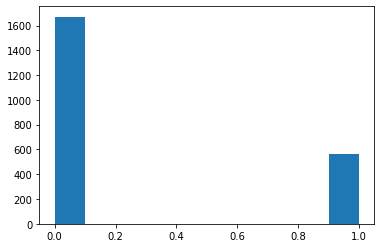

In [ ]:
# Class distribution
plt.hist(potholes['pothole'])
print("Images with potholes: " + str(len(potholes[potholes['pothole']>0])))
print("Images without potholes: " + str(len(potholes[potholes['pothole']<1])))

#### Distribution of bounding box widths and heights

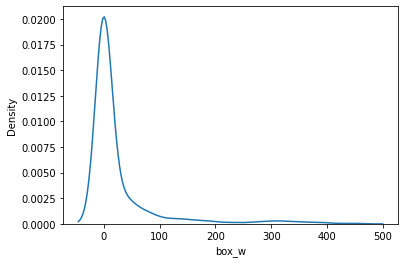

In [ ]:
# Distribution of bounding box widths
sns.kdeplot(potholes['box_w'])

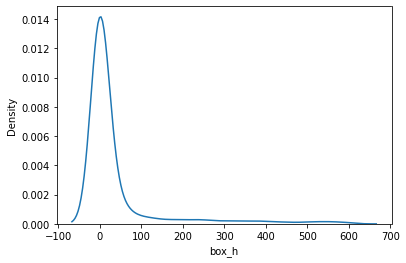

In [ ]:
# Distribution of bouding box heights
sns.kdeplot(potholes['box_h'])

#### Examples of each target class

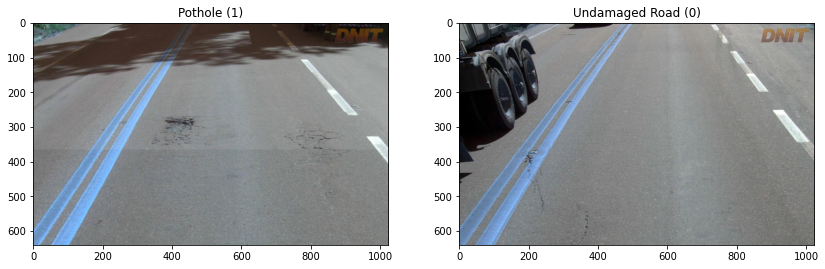

In [ ]:
# Plot Examples of Classes
master = 'biankatpas-Cracks-and-Potholes-in-Road-Images-Dataset-1f20054/Dataset'
path = master + "/765254_ES_259_259ES000000_00370/765254_ES_259_259ES000000_00370_RAW.jpg"
pothole_example = cv2.imread(path)
path = master + "/765442_ES_259_259ES000000_01310/765442_ES_259_259ES000000_01310_RAW.jpg"
undamaged_example = cv2.imread(path)
fig, axs = plt.subplots(1,2, figsize=(14,20))
axs[0].set_title("Pothole (1)")
axs[0].imshow(pothole_example)
axs[1].set_title("Undamaged Road (0)")
axs[1].imshow(undamaged_example)

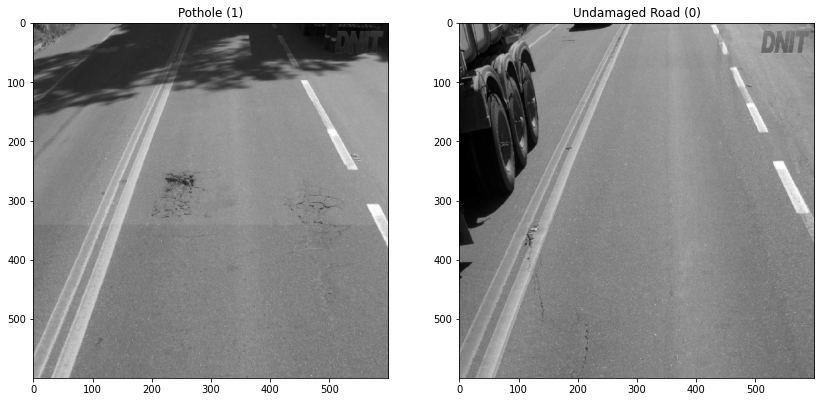

In [ ]:
# After rescaling and normalization
master = 'biankatpas-Cracks-and-Potholes-in-Road-Images-Dataset-1f20054/Dataset'
path = master + "/765254_ES_259_259ES000000_00370/765254_ES_259_259ES000000_00370_RAW.jpg"
img = keras.preprocessing.image.load_img(path, color_mode = 'grayscale', target_size = (600, 600))
img = np.asarray(img)
pothole_example = img/255
path = master + "/765442_ES_259_259ES000000_01310/765442_ES_259_259ES000000_01310_RAW.jpg"
img = keras.preprocessing.image.load_img(path, color_mode = 'grayscale', target_size = (600, 600))
img = np.asarray(img)
undamaged_example = img/255
fig, axs = plt.subplots(1,2, figsize=(14,20))
axs[0].set_title("Pothole (1)")
axs[0].imshow(pothole_example, cmap= 'gray')
axs[1].set_title("Undamaged Road (0)")
axs[1].imshow(undamaged_example, cmap= 'gray')

### Train/Validate split

In [ ]:
# Train/Valitate split
train, val, a, b = train_test_split(potholes, potholes,test_size = 0.2)
train_imgs = np.array(train['img'])
train_targets = np.array(train['box'])

In [ ]:
train_targets

array(['(0, 0, 0, 0)', '(205, 279, 25, 27)', '(0, 0, 0, 0)', ...,
       '(0, 0, 0, 0)', '(173, 315, 72, 48)', '(0, 0, 0, 0)'], dtype=object)